In [1]:
! pip install keras

In [2]:
! pip install tensorflow==2.2

  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


(50000, 28, 28) (50000,)


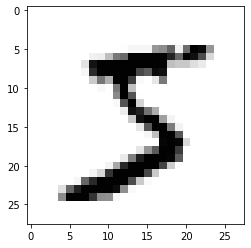

In [1]:
import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

%matplotlib inline

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    
    # Оставим 10000 примеров на валидацию
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Размеры
print(X_train.shape, y_train.shape)
## Нарисуем пример
plt.imshow(X_train[0], cmap="Greys");

In [2]:
## Сделаем объекты плоскими N*28*28 to  N*784

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

## Лейблы нужно сделать One-Hot
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=5, batch_size=10, 
          validation_data=(X_test, y_test))

test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}')

Epoch 1/5
5000/5000 [==============================] - 4s 867us/step - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0848 - val_mean_squared_error: 0.0848
Epoch 2/5
5000/5000 [==============================] - 4s 813us/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 3/5
5000/5000 [==============================] - 4s 826us/step - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 4/5
5000/5000 [==============================] - 4s 868us/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.0461 - val_mean_squared_error: 0.0461
Epoch 5/5
313/313 [==============================] - 0s 739us/step - loss: 0.0331 - mean_squared_error: 0.0331
Test loss: 0.03314141556620598, test mse: 0.03314141556620598


# Задание 1
1. Выбрать верный loss
2. Добавить accuracy как оценку качества
3. Исследовать изменение качества при
        3.1. Изменении числа слоев
        3.2. Изменении числа нейронов
        3.3. Изменение функции активации
3. Исследовать параметры SGD, сделать выводы

```
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)
```

## Выбираем функцию потерь: бинарная кросс-валидация

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2932 - mean_squared_error: 0.0831
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.2454 - mean_squared_error: 0.0704
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 0.2048 - mean_squared_error: 0.0577
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1728 - mean_squared_error: 0.0475
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.1493 - mean_squared_error: 0.0402


In [7]:
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1352 - mean_squared_error: 0.0358
Test loss: 0.13516487181186676, test mse: 0.03577910363674164


## Добавляем accuracy

In [8]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/5
5000/5000 [==============================] - 4s 895us/step - loss: 0.0861 - mean_squared_error: 0.0861 - accuracy: 0.2392 - val_loss: 0.0803 - val_mean_squared_error: 0.0803 - val_accuracy: 0.3727
Epoch 2/5
5000/5000 [==============================] - 4s 898us/step - loss: 0.0735 - mean_squared_error: 0.0735 - accuracy: 0.4396 - val_loss: 0.0655 - val_mean_squared_error: 0.0655 - val_accuracy: 0.5205
Epoch 3/5
5000/5000 [==============================] - 5s 915us/step - loss: 0.0583 - mean_squared_error: 0.0583 - accuracy: 0.5964 - val_loss: 0.0487 - val_mean_squared_error: 0.0487 - val_accuracy: 0.6995
Epoch 4/5
5000/5000 [==============================] - 5s 942us/step - loss: 0.0442 - mean_squared_error: 0.0442 - accuracy: 0.7186 - val_loss: 0.0374 - val_mean_squared_error: 0.0374 - val_accuracy: 0.7657
Epoch 5/5
5000/5000 [==============================] - 5s 921us/step - loss: 0.0358 - mean_squared_error: 0.0358 - accuracy: 0.7685 - val_loss: 0.0307 - val_mean_squared_er

In [9]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 995us/step - loss: 0.0307 - mean_squared_error: 0.0307 - accuracy: 0.8025
Test loss: 0.030711423605680466, test mse: 0.030711423605680466, test accuracy: 0.8025000095367432


## Меняем количество слоев

In [10]:
# Добавляем новый слой с 256 нейронами в середину

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.3077 - mean_squared_error: 0.0865 - accuracy: 0.3222
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2688 - mean_squared_error: 0.0769 - accuracy: 0.5978
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2255 - mean_squared_error: 0.0641 - accuracy: 0.6995
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1850 - mean_squared_error: 0.0516 - accuracy: 0.7558
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1537 - mean_squared_error: 0.0420 - accuracy: 0.7944


In [11]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1367 - mean_squared_error: 0.0369 - accuracy: 0.8198
Test loss: 0.13674098253250122, test mse: 0.036907412111759186, test accuracy: 0.8198000192642212


## Меняем количество нейронов

In [12]:
# Меняем у нового слоя количество нейронов с 256 до 16

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 4ms/step - loss: 0.3153 - mean_squared_error: 0.0881 - accuracy: 0.2071
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.2918 - mean_squared_error: 0.0831 - accuracy: 0.4208
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 0.2625 - mean_squared_error: 0.0756 - accuracy: 0.5530
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 0.2299 - mean_squared_error: 0.0659 - accuracy: 0.6681
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 0.1960 - mean_squared_error: 0.0553 - accuracy: 0.7439


In [13]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1773 - mean_squared_error: 0.0493 - accuracy: 0.7710
Test loss: 0.17725180089473724, test mse: 0.04933655634522438, test accuracy: 0.7710000276565552


## Меняем функцию активации

In [14]:
# Заменяем функцию активации на ReLu

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='relu'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 0.7382 - mean_squared_error: 0.3381 - accuracy: 0.2466
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.9197 - mean_squared_error: 0.1575 - accuracy: 0.1665
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 0.2637 - mean_squared_error: 0.0761 - accuracy: 0.3984
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 0.2565 - mean_squared_error: 0.0719 - accuracy: 0.5214
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 0.3943 - mean_squared_error: 0.0816 - accuracy: 0.4752


In [15]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.5338 - mean_squared_error: 0.0887 - accuracy: 0.2162
Test loss: 0.5338338017463684, test mse: 0.08866886794567108, test accuracy: 0.21619999408721924


## SGD

In [16]:
import pandas as pd

In [17]:
SGD_statistics = pd.DataFrame(columns=['nesterov', 'learning_rate', 'momentum',
                                      'test_loss', 'test_mse', 'test_accuracy'])

In [18]:
k = 0
for nesterov in [True, False]:
    for learning_rate in [0.01, 0.05, 0.1, 0.5, 1]:
        for momentum in [0.0, 0.1]:
            sgd = SGD(
                learning_rate=learning_rate, momentum=momentum, nesterov=nesterov, name="SGD"
            )
            model = Sequential()
            model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
            model.add(Dense(256, activation='relu'))
            model.add(Dense(10, activation='softmax'))

            model.compile(optimizer=sgd,
                            loss='binary_crossentropy',
                            metrics = ['mean_squared_error', 'accuracy'])

            model.fit(X_train, y_train, epochs=5, batch_size=128)

            test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
#             print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')
            SGD_statistics.loc[k] = [nesterov, learning_rate, momentum,
                             test_loss, test_mse, test_acc]
            k+=1

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3097 - mean_squared_error: 0.0868 - accuracy: 0.3051
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2693 - mean_squared_error: 0.0770 - accuracy: 0.6024
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2242 - mean_squared_error: 0.0637 - accuracy: 0.6966
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1818 - mean_squared_error: 0.0506 - accuracy: 0.7543
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1319 - mean_squared_error: 0.0353 - accuracy: 0.8291
Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3055 - mean_squared_error: 0.0858 - accuracy: 0.3465
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2578 - mean_squared_error: 0.0736 - accuracy: 0.6299
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2081 - mean_squared_error: 0.

313/313 [==============================] - 0s 1ms/step - loss: 0.1243 - mean_squared_error: 0.0329 - accuracy: 0.8392
Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3055 - mean_squared_error: 0.0861 - accuracy: 0.3372
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 0.2620 - mean_squared_error: 0.0753 - accuracy: 0.6550
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2123 - mean_squared_error: 0.0604 - accuracy: 0.7376
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1681 - mean_squared_error: 0.0464 - accuracy: 0.7883
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1204 - mean_squared_error: 0.0318 - accuracy: 0.8426
Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2226 - mean_squared_error: 0.0625 - accuracy: 0.6694
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 0.1024 - mean_squared_error: 0.0269 - acc

In [19]:
import seaborn as sns

In [20]:
cm = sns.light_palette("green", as_cmap=True)
SGD_statistics.style.background_gradient(cmap=cm)

,nesterov,learning_rate,momentum,test_loss,test_mse,test_accuracy
0,True,0.010000,0.000000,0.131866,0.035271,0.829100
1,True,0.010000,0.100000,0.119838,0.031615,0.845800
2,True,0.050000,0.000000,0.051939,0.013403,0.913800
3,True,0.050000,0.100000,0.050904,0.013055,0.915700
4,True,0.100000,0.000000,0.041005,0.010445,0.932600
5,True,0.100000,0.100000,0.041161,0.010522,0.932400
6,True,0.500000,0.000000,0.020276,0.005267,0.965200
7,True,0.500000,0.100000,0.019528,0.005141,0.967300
8,True,1.000000,0.000000,0.017266,0.004537,0.970900
9,True,1.000000,0.100000,0.014585,0.003932,0.973300


In [ ]:
# Вывод - по большому счету значение имеет только learning rate

# Задание 2
1. Переделать модель в Functional API
2. Добавить логирование в Tensorboard, early stopping callback
3. Протестировать:
        3.1. +Adagrad, Adam
        3.2. Добавление BatchNorm/Dropout
4. kerastuner 

In [21]:
task2_statistics = pd.DataFrame(columns=['name', 'test_loss', 'test_mse', 'test_accuracy'])
k = 0

## Functional API

In [22]:
# Было
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3100 - mean_squared_error: 0.0871 - accuracy: 0.3154
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2746 - mean_squared_error: 0.0787 - accuracy: 0.6174
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2331 - mean_squared_error: 0.0667 - accuracy: 0.7130
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1903 - mean_squared_error: 0.0533 - accuracy: 0.7674
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1550 - mean_squared_error: 0.0422 - accuracy: 0.8050


In [23]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1366 - mean_squared_error: 0.0366 - accuracy: 0.8341
Test loss: 0.13656680285930634, test mse: 0.03657831996679306, test accuracy: 0.8341000080108643


In [24]:
from keras.layers import Input
from keras.models import Model

In [25]:
# Стало
input1 = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(input1)
hidden2 = Dense(256, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)
model = Model(inputs=input1, outputs=output)

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 0.3060 - mean_squared_error: 0.0860 - accuracy: 0.3045
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2646 - mean_squared_error: 0.0756 - accuracy: 0.6112
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.2203 - mean_squared_error: 0.0628 - accuracy: 0.7203
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1791 - mean_squared_error: 0.0499 - accuracy: 0.7730
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.1474 - mean_squared_error: 0.0401 - accuracy: 0.8075


In [26]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1309 - mean_squared_error: 0.0350 - accuracy: 0.8295
Test loss: 0.13094285130500793, test mse: 0.035044047981500626, test accuracy: 0.8295000195503235


## Tensorboard, early stopping callback

In [27]:
import datetime
import tensorflow as tf

In [28]:
input1 = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(input1)
hidden2 = Dense(256, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)
model = Model(inputs=input1, outputs=output)

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2465 - mean_squared_error: 0.0699 - accuracy: 0.6023 - val_loss: 0.1618 - val_mean_squared_error: 0.0445 - val_accuracy: 0.8105
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1232 - mean_squared_error: 0.0330 - accuracy: 0.8367 - val_loss: 0.0911 - val_mean_squared_error: 0.0234 - val_accuracy: 0.8713
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0842 - mean_squared_error: 0.0219 - accuracy: 0.8733 - val_loss: 0.0706 - val_mean_squared_error: 0.0180 - val_accuracy: 0.8932
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0701 - mean_squared_error: 0.0182 - accuracy: 0.8877 - val_loss: 0.0619 - val_mean_squared_error: 0.0158 - val_accuracy: 0.9010
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0629 - mean_squared_error: 0.0163 - accuracy: 0.8965 - val_loss: 0.0561 - val_mean_squared_error: 

In [29]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')
task2_statistics.loc[k] = ['early_stopping_callback', test_loss, test_mse, test_acc]
k+=1

313/313 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_squared_error: 0.0103 - accuracy: 0.9331
Test loss: 0.04019411653280258, test mse: 0.010297681204974651, test accuracy: 0.9330999851226807


In [30]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 190860), started 0:29:07 ago. (Use '!kill 190860' to kill it.)

## Agagrad, Adam

In [31]:
input1 = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(input1)
hidden2 = Dense(256, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)
model = Model(inputs=input1, outputs=output)

model.compile(optimizer='Adagrad',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001)

history_adagrad = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0609 - mean_squared_error: 0.0159 - accuracy: 0.9015 - val_loss: 0.0413 - val_mean_squared_error: 0.0105 - val_accuracy: 0.9331
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0405 - mean_squared_error: 0.0103 - accuracy: 0.9335 - val_loss: 0.0364 - val_mean_squared_error: 0.0093 - val_accuracy: 0.9395
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0357 - mean_squared_error: 0.0091 - accuracy: 0.9415 - val_loss: 0.0330 - val_mean_squared_error: 0.0084 - val_accuracy: 0.9453
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0327 - mean_squared_error: 0.0083 - accuracy: 0.9467 - val_loss: 0.0311 - val_mean_squared_error: 0.0079 - val_accuracy: 0.9500
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0305 - mean_squared_error: 0.0077 - accuracy: 0.9502 - val_loss: 0.0295 - val_mean_squared_error: 

In [32]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')
task2_statistics.loc[k] = ['adagrad', test_loss, test_mse, test_acc]
k+=1

313/313 [==============================] - 0s 1ms/step - loss: 0.0265 - mean_squared_error: 0.0068 - accuracy: 0.9555
Test loss: 0.026515942066907883, test mse: 0.00676985876634717, test accuracy: 0.9555000066757202


In [33]:
input1 = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(input1)
hidden2 = Dense(256, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)
model = Model(inputs=input1, outputs=output)

model.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001)

history_adam = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0353 - mean_squared_error: 0.0094 - accuracy: 0.9377 - val_loss: 0.0250 - val_mean_squared_error: 0.0065 - val_accuracy: 0.9570
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0157 - mean_squared_error: 0.0042 - accuracy: 0.9727 - val_loss: 0.0157 - val_mean_squared_error: 0.0042 - val_accuracy: 0.9729
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0103 - mean_squared_error: 0.0027 - accuracy: 0.9825 - val_loss: 0.0144 - val_mean_squared_error: 0.0037 - val_accuracy: 0.9762
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0087 - mean_squared_error: 0.0023 - accuracy: 0.9849 - val_loss: 0.0108 - val_mean_squared_error: 0.0028 - val_accuracy: 0.9820
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0065 - mean_squared_error: 0.0017 - accuracy: 0.9886 - val_loss: 0.0166 - val_mean_squared_error: 

In [34]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')
task2_statistics.loc[k] = ['adam', test_loss, test_mse, test_acc]
k+=1

313/313 [==============================] - 0s 1ms/step - loss: 0.0166 - mean_squared_error: 0.0041 - accuracy: 0.9732
Test loss: 0.016559211537241936, test mse: 0.004141923505812883, test accuracy: 0.9732000231742859


## BatchNorm/Dropout

In [6]:
from keras.layers import Dropout, BatchNormalization, Activation

In [36]:
# Batch normalization добавляем после плотного слоя и перед активацией, дропаут - между слоями
model = Sequential()
model.add(Dense(512, input_shape=(28 * 28,)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics = ['mean_squared_error', 'accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001)

history_batch_norm = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1909 - mean_squared_error: 0.0529 - accuracy: 0.6176 - val_loss: 0.0914 - val_mean_squared_error: 0.0237 - val_accuracy: 0.8645
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1055 - mean_squared_error: 0.0287 - accuracy: 0.8140 - val_loss: 0.0641 - val_mean_squared_error: 0.0165 - val_accuracy: 0.8980
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0859 - mean_squared_error: 0.0232 - accuracy: 0.8463 - val_loss: 0.0535 - val_mean_squared_error: 0.0139 - val_accuracy: 0.9126
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0755 - mean_squared_error: 0.0204 - accuracy: 0.8653 - val_loss: 0.0473 - val_mean_squared_error: 0.0124 - val_accuracy: 0.9214
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0692 - mean_squared_error: 0.0186 - accuracy: 0.8771 - val_loss: 0.0432 - val_mean_squared_error: 

In [37]:
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')
task2_statistics.loc[k] = ['batch_norm', test_loss, test_mse, test_acc]
k+=1

313/313 [==============================] - 0s 2ms/step - loss: 0.0292 - mean_squared_error: 0.0077 - accuracy: 0.9495
Test loss: 0.02916409634053707, test mse: 0.007718810811638832, test accuracy: 0.9495000243186951


In [38]:
cm = sns.light_palette("green", as_cmap=True)
task2_statistics.style.background_gradient(cmap=cm)

,name,test_loss,test_mse,test_accuracy
0,early_stopping_callback,0.040194,0.010298,0.933100
1,adagrad,0.026516,0.006770,0.955500
2,adam,0.016559,0.004142,0.973200
3,batch_norm,0.029164,0.007719,0.949500


In [43]:
# Вывод - пока лучше всего сработала версия с Адамом

## keras tuner

In [59]:
!pip install keras-tuner

In [7]:
from kerastuner.tuners import RandomSearch
from keras.optimizers import Adam

# Ищем оптимальное количество нейронов на последних двух слоях и оптимальный learning rate Адама
def build(hp):
    model = Sequential()
    model.add(Dense(512, input_shape=(28 * 28,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dropout(0.5))

    model.add(Dense(hp.Int('units', min_value=32, max_value=256, step=32)),)
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), 
                    loss='binary_crossentropy',
                    metrics = ['mean_squared_error', 'accuracy'])
    return model

In [8]:
tuner = RandomSearch(
    build,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [9]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 01m 50s]
val_accuracy: 0.9794666568438212

Best val_accuracy So Far: 0.9794666568438212
Total elapsed time: 00h 09m 25s
INFO:tensorflow:Oracle triggered exit


In [10]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.001
Score: 0.9794666568438212
Trial summary
Hyperparameters:
units: 256
learning_rate: 0.01
Score: 0.9752999941507975
Trial summary
Hyperparameters:
units: 224
learning_rate: 0.0001
Score: 0.9717333316802979
Trial summary
Hyperparameters:
units: 256
learning_rate: 0.0001
Score: 0.9714666803677877
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.9661999940872192
